# This code is to analysis the relationship between the power level and the performance of the GPU

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

## find the directory of the data

In [2]:
current_path = os.getcwd()
data_path = os.path.join(current_path, 'ModelsData/resnet18')
data_folders = os.listdir(data_path)
print(data_folders)

['E5_B128_R0_SR2_performance_140', 'E5_B128_R0_SR2_performance_310', 'E5_B128_R0_SR2_performance_170', 'E5_B128_R0_SR2_performance_320', 'E5_B128_R0_SR2_performance_290', '.DS_Store', 'E5_B128_R0_SR2_performance_230', 'E5_B128_R0_SR2_performance_200', 'fashion_mnist', 'E5_B128_R0_SR2_performance_240', 'data_power_freq.csv', 'E5_B128_R0_SR2_performance_270', 'E5_B128_R0_SR2_performance_130', 'E5_B128_R0_SR2_performance_190', 'E5_B128_R0_SR2_performance_100', 'E5_B128_R0_SR2_performance_110', 'E5_B128_R0_SR2_performance_120', 'E5_B128_R0_SR2_performance_180', 'E5_B128_R0_SR2_performance_260', 'E5_B128_R0_SR2_layer', 'E5_B128_R0_SR2_performance_250', 'E5_B128_R0_SR2_performance_210', 'E5_B128_R0_SR2_performance_280', 'E5_B128_R0_SR2_performance_220', 'E5_B128_R0_SR2_performance_160', 'E5_B128_R0_SR2_performance_150', 'E5_B128_R0_SR2_performance_300']


In [3]:
# find out all the folder names with performance
performance_folders = []
for folder in data_folders:
    if 'performance' in folder:
        performance_folders.append(folder)
print(performance_folders)

# reorder the performance folders based on the last number in the
#  folder name
performance_folders.sort(key=lambda x: int(x.split('_')[-1]))
print(performance_folders)

data_folders = performance_folders

['E5_B128_R0_SR2_performance_140', 'E5_B128_R0_SR2_performance_310', 'E5_B128_R0_SR2_performance_170', 'E5_B128_R0_SR2_performance_320', 'E5_B128_R0_SR2_performance_290', 'E5_B128_R0_SR2_performance_230', 'E5_B128_R0_SR2_performance_200', 'E5_B128_R0_SR2_performance_240', 'E5_B128_R0_SR2_performance_270', 'E5_B128_R0_SR2_performance_130', 'E5_B128_R0_SR2_performance_190', 'E5_B128_R0_SR2_performance_100', 'E5_B128_R0_SR2_performance_110', 'E5_B128_R0_SR2_performance_120', 'E5_B128_R0_SR2_performance_180', 'E5_B128_R0_SR2_performance_260', 'E5_B128_R0_SR2_performance_250', 'E5_B128_R0_SR2_performance_210', 'E5_B128_R0_SR2_performance_280', 'E5_B128_R0_SR2_performance_220', 'E5_B128_R0_SR2_performance_160', 'E5_B128_R0_SR2_performance_150', 'E5_B128_R0_SR2_performance_300']
['E5_B128_R0_SR2_performance_100', 'E5_B128_R0_SR2_performance_110', 'E5_B128_R0_SR2_performance_120', 'E5_B128_R0_SR2_performance_130', 'E5_B128_R0_SR2_performance_140', 'E5_B128_R0_SR2_performance_150', 'E5_B128_R0_

In [4]:
# read the data_power_freq.csv file
data_power_freq = pd.read_csv(os.path.join(data_path, 'data_power_freq.csv'))

## load the trainging info 

In [5]:
# set the epoch number, batch size and the round number as well as the sampling rate
epoch = 5
batch_size = 128
round_num = 0
sampling_rate = 2

## get the data across the different power level

In [6]:
# test code 
# load the backward_energy.npy file
dataset_dir = 'fashion_mnist'
test_folder = os.path.join(data_path, data_folders[0])
test_folder_dataset_dir = os.path.join(test_folder, dataset_dir)
backward_energy = np.load(os.path.join(test_folder_dataset_dir, 'backward_energy.npy'))
print(backward_energy.shape)

(5, 469, 3)


In [7]:
# create a function to calculate the energy consumption of each step
def calculate_energy(npyfile):
    batch_energy = []
    # the shape of the file is (num_epochs, num_batches, 3), in here is the (5, 469, 3)
    # the 3 is the start time, end time and power recorded at that time period
    for epoch in range(npyfile.shape[0]):
        for batch in range(npyfile.shape[1]):
            # calculate the energy consumption of each step
            energyi = npyfile[epoch][batch][2] * (npyfile[epoch][batch][1] - npyfile[epoch][batch][0])
            batch_energy.append(energyi)
    return np.array(batch_energy)

In [8]:
# create a dictionary to store the data
data_dict = {}
for folder in data_folders:
    folder_dataset_dir = os.path.join(data_path, folder, dataset_dir)
    # load the .npy files
    data_dict[folder] = {}
    to_device_energy = np.load(os.path.join(folder_dataset_dir, 'to_device_energy.npy'), allow_pickle=True)
    forward_energy = np.load(os.path.join(folder_dataset_dir, 'forward_energy.npy'), allow_pickle=True)
    loss_energy = np.load(os.path.join(folder_dataset_dir, 'loss_energy.npy'), allow_pickle=True)   
    backward_energy = np.load(os.path.join(folder_dataset_dir, 'backward_energy.npy'), allow_pickle=True)
    optimize_energy = np.load(os.path.join(folder_dataset_dir, 'optimize_energy.npy'), allow_pickle=True)
    data_dict[folder]['to_device_energy'] = calculate_energy(to_device_energy)
    data_dict[folder]['forward_energy'] = calculate_energy(forward_energy)
    data_dict[folder]['loss_energy'] = calculate_energy(loss_energy)
    data_dict[folder]['backward_energy'] = calculate_energy(backward_energy)
    data_dict[folder]['optimize_energy'] = calculate_energy(optimize_energy)


In [9]:
# for key and value in the data_dict, plot the energy consumption, the x-axis is the different power levels
x_axis = [int(i.split('_')[-1]) for i in data_folders]
print(x_axis)
# create lists to store the energy values for each step
to_device_energies = []
forward_energies = []
loss_energies = []
backward_energies = []
optimize_energies = []

# collect data for each power level
for key, value in data_dict.items():
    to_device_energies.append(np.sum(value['to_device_energy']))
    forward_energies.append(np.sum(value['forward_energy']))
    loss_energies.append(np.sum(value['loss_energy']))
    backward_energies.append(np.sum(value['backward_energy']))
    optimize_energies.append(np.sum(value['optimize_energy']))

[100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320]


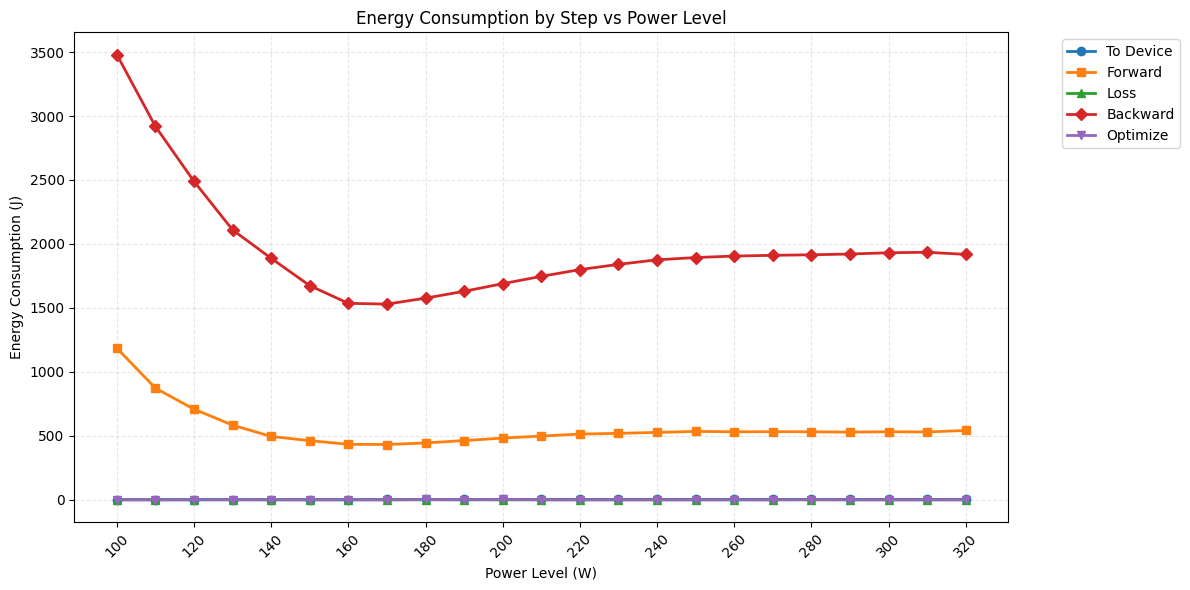

In [10]:
plt.figure(figsize=(12, 6))

# Plot lines for each step
plt.plot(x_axis, to_device_energies, marker='o', label='To Device', linewidth=2)
plt.plot(x_axis, forward_energies, marker='s', label='Forward', linewidth=2)
plt.plot(x_axis, loss_energies, marker='^', label='Loss', linewidth=2)
plt.plot(x_axis, backward_energies, marker='D', label='Backward', linewidth=2)
plt.plot(x_axis, optimize_energies, marker='v', label='Optimize', linewidth=2)

# Customize the plot
plt.xlabel('Power Level (W)', fontsize=10)
plt.ylabel('Energy Consumption (J)', fontsize=10)
plt.title('Energy Consumption by Step vs Power Level', fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Set x-axis ticks
plt.xticks(range(100, 330, 20), rotation=45)

# Add grid
plt.grid(True, alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

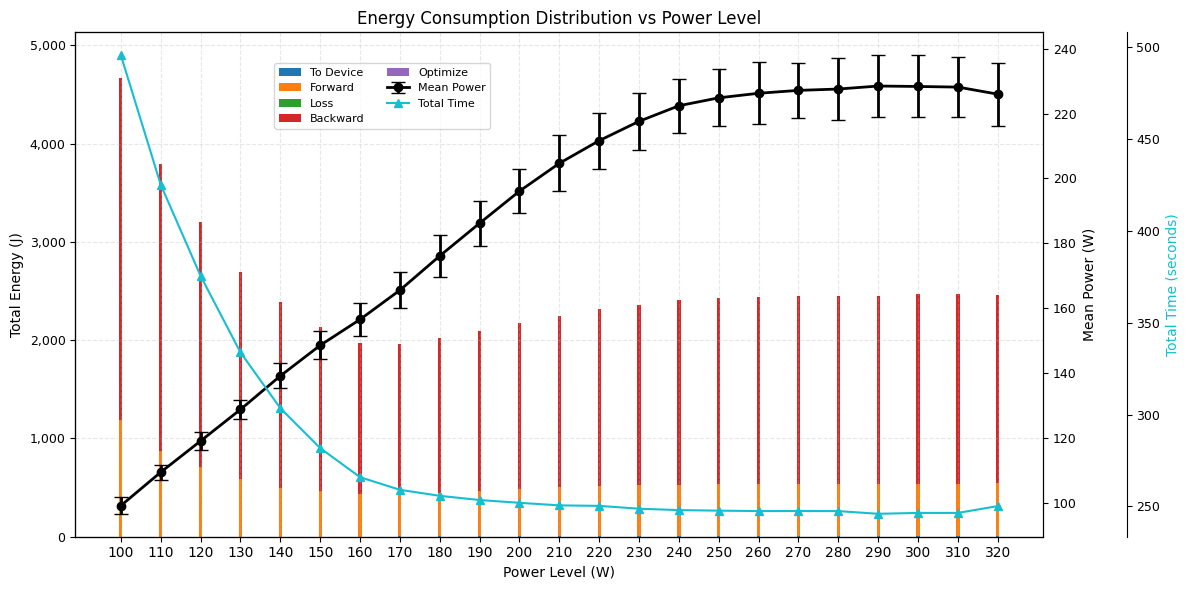

In [11]:
# Create figure with primary and secondary y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# Offset the right spine of ax3
ax3.spines['right'].set_position(('outward', 60))

# Define more distinct colors suitable for publications
colors = {
    'to_device': '#1f77b4',    # blue
    'forward': '#ff7f0e',      # orange
    'loss': '#2ca02c',         # green
    'backward': '#d62728',     # red
    'optimize': '#9467bd',     # purple
    'mean_power': '#000000',   # black
    'total_time': '#17becf'    # cyan
}

# Plot stacked bars on the first y-axis
ax1.bar(x_axis, to_device_energies, label='To Device', color=colors['to_device'])
ax1.bar(x_axis, forward_energies, bottom=to_device_energies, label='Forward', color=colors['forward'])
ax1.bar(x_axis, loss_energies, bottom=[i+j for i,j in zip(to_device_energies, forward_energies)], 
    label='Loss', color=colors['loss'])
ax1.bar(x_axis, backward_energies, 
    bottom=[i+j+k for i,j,k in zip(to_device_energies, forward_energies, loss_energies)], 
    label='Backward', color=colors['backward'])
ax1.bar(x_axis, optimize_energies, 
    bottom=[i+j+k+l for i,j,k,l in zip(to_device_energies, forward_energies, loss_energies, backward_energies)], 
    label='Optimize', color=colors['optimize'])

# Plot mean power with error bars on the second y-axis
ax2.errorbar(data_power_freq['power_level'], data_power_freq['mean_power'], 
             yerr=data_power_freq['std_power'], color=colors['mean_power'], label='Mean Power',
             marker='o', linewidth=2, capsize=5)

# Plot total time on the third y-axis
ax3.plot(data_power_freq['power_level'], data_power_freq['total_time'], 
         color=colors['total_time'], label='Total Time', marker='^')

# Set labels and title
ax1.set_xlabel('Power Level (W)', fontsize=10)
ax1.set_ylabel('Total Energy (J)', fontsize=10)
ax2.set_ylabel('Mean Power (W)', color=colors['mean_power'], fontsize=10)
ax3.set_ylabel('Total Time (seconds)', color=colors['total_time'], fontsize=10)

# Set maximum value for left y-axis (adding 10% margin)
total_heights = [sum(x) for x in zip(to_device_energies, forward_energies, loss_energies, backward_energies, optimize_energies)]
max_height = max(total_heights)
ax1.set_ylim(0, max_height * 1.1)

plt.title('Energy Consumption Distribution vs Power Level', fontsize=12)

# Format y-axis ticks for better readability
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.tick_params(axis='y', labelsize=9)
ax2.tick_params(axis='y', labelsize=9)
ax3.tick_params(axis='y', labelsize=9)

# Add legends for all three axes with adjusted position
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, 
          bbox_to_anchor=(0.2, 0.95), loc='upper left', 
          prop={'size': 8}, ncol=2)

# Add grid with custom style
ax1.grid(True, alpha=0.3, linestyle='--')

# Set x-axis ticks
plt.xticks(range(100, 330, 10), rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()


In [16]:
plt.style.use('seaborn-v0_8-paper')
# Set all fonts to serif
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']  # Specify Times New Roman as the serif font
plt.rcParams['font.size'] = 25
plt.rcParams['axes.labelsize'] = 25 
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25

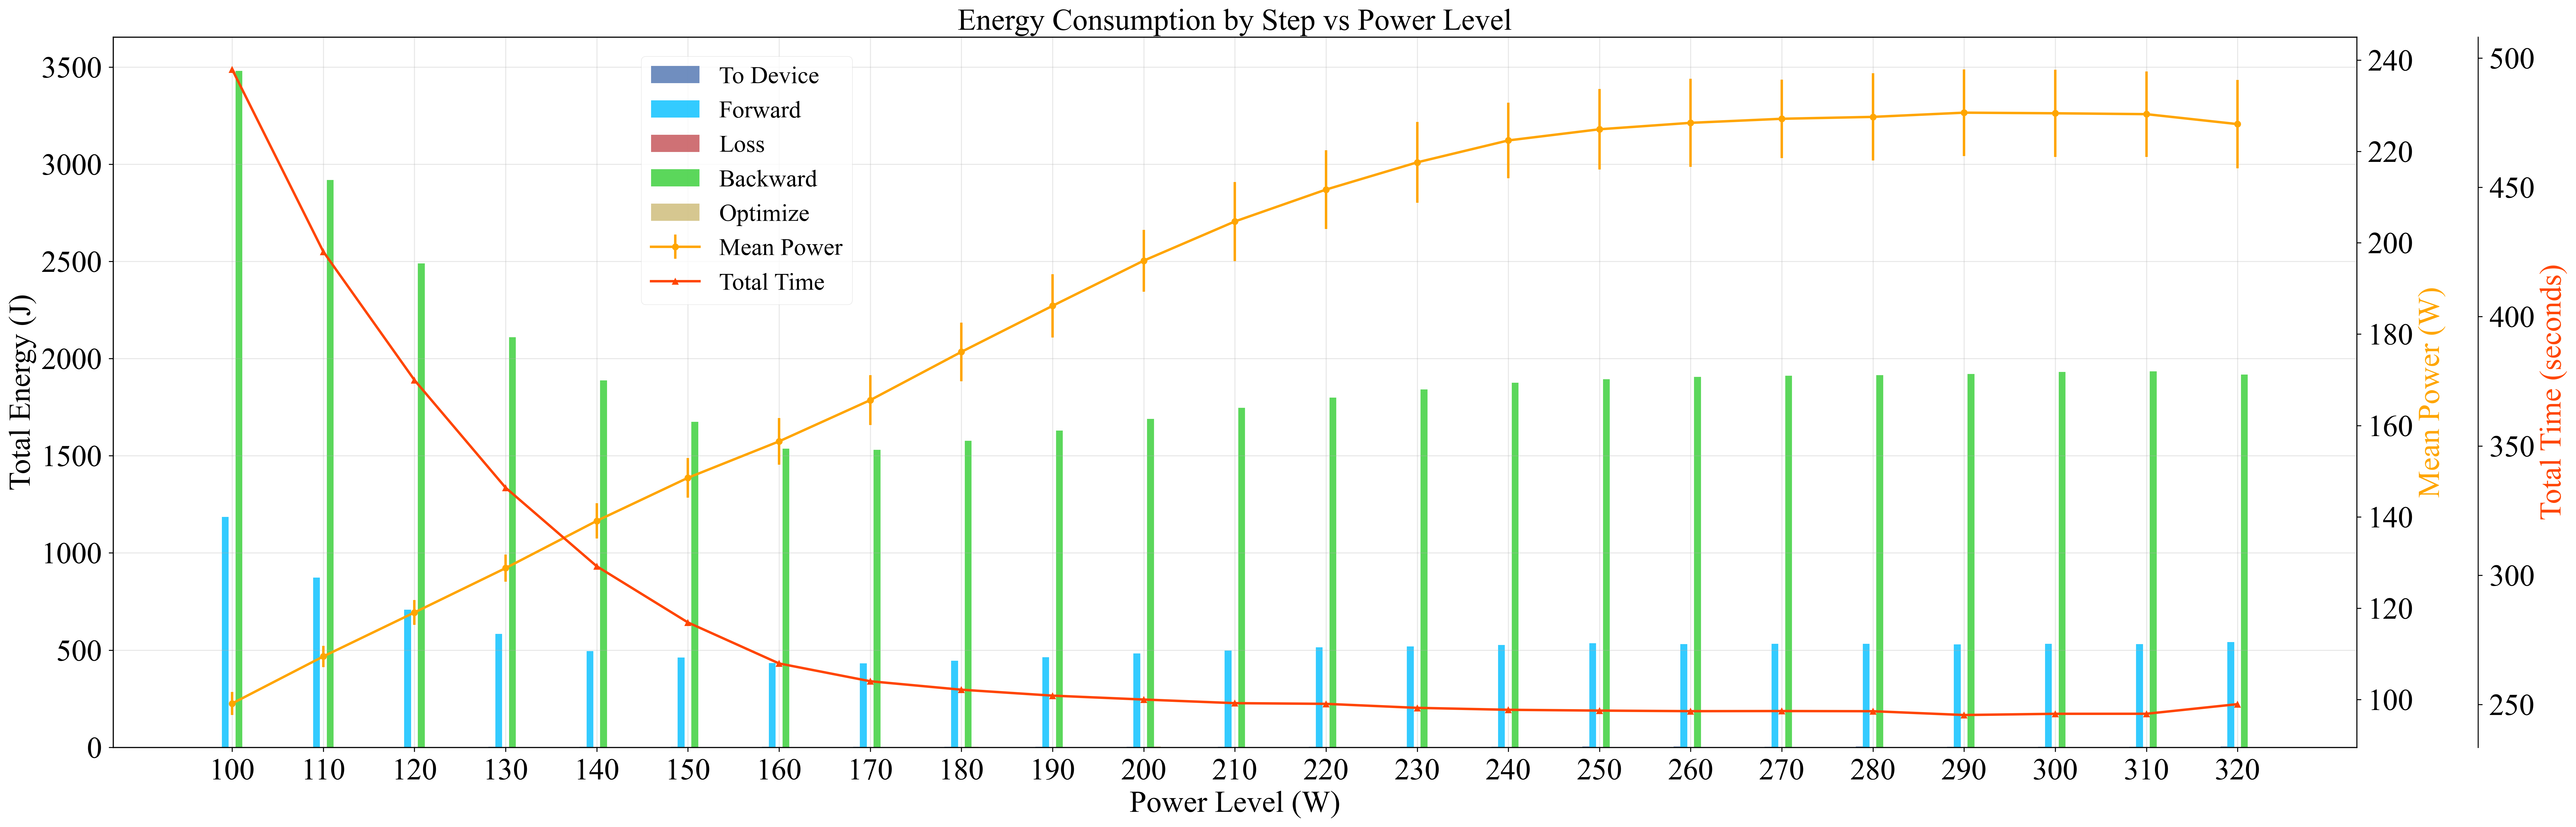

In [26]:
plt.figure(figsize=(30, 10), dpi=300)  # Increased width from 20 to 30

# Set width for the bars
bar_width = 0.15
x_positions = np.arange(len(x_axis)) * 2.0  # Increased spacing from 1.5 to 2.0

# Create primary and secondary y-axes
ax1 = plt.gca()
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# Offset the right spine of ax3
ax3.spines['right'].set_position(('outward', 100))  # Increased offset from 60 to 100

# Plot bars on primary y-axis with more academic colors
ax1.bar(x_positions - 2*bar_width, to_device_energies, width=bar_width, label='To Device', color='#4C72B0', alpha=0.8)  # Navy blue
ax1.bar(x_positions - bar_width, forward_energies, width=bar_width, label='Forward', color='#00BFFF', alpha=0.8)  # Bright blue
ax1.bar(x_positions, loss_energies, width=bar_width, label='Loss', color='#C44E52', alpha=0.8)  # Crimson
ax1.bar(x_positions + bar_width, backward_energies, width=bar_width, label='Backward', color='#32CD32', alpha=0.8)  # Lime green
ax1.bar(x_positions + 2*bar_width, optimize_energies, width=bar_width, label='Optimize', color='#CCB974', alpha=0.8)  # Gold

# Plot mean power with error bars on second y-axis
power_line = ax2.errorbar(x_positions, data_power_freq['mean_power'], 
                         yerr=data_power_freq['std_power'], 
                         color='#FFA500', label='Mean Power',  # Bright orange
                         marker='o', capsize=5, linewidth=2)

# Plot total time on third y-axis
time_line = ax3.plot(x_positions, data_power_freq['total_time'], 
                     color='#FF4500', label='Total Time', marker='^',  # Bright red-orange
                     linewidth=2)

# Set labels and title
ax1.set_xlabel('Power Level (W)', fontsize=25)
ax1.set_ylabel('Total Energy (J)', fontsize=25)
ax2.set_ylabel('Mean Power (W)', color='#FFA500', fontsize=25)  # Updated color to match line
ax3.set_ylabel('Total Time (seconds)', color='#FF4500', fontsize=25)  # Updated color

plt.title('Energy Consumption by Step vs Power Level', fontsize=25)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, 
          bbox_to_anchor=(0.23, 0.99), loc='upper left', fontsize=20)

# Add grid
ax1.grid(True, alpha=0.3)

# Set x-axis ticks with the actual power level values
plt.xticks(x_positions, x_axis, rotation=45, fontsize=25)
plt.yticks(fontsize=25)
ax2.tick_params(axis='y', labelsize=25)
ax3.tick_params(axis='y', labelsize=25)

# Adjust layout to prevent label cutoff
plt.tight_layout()


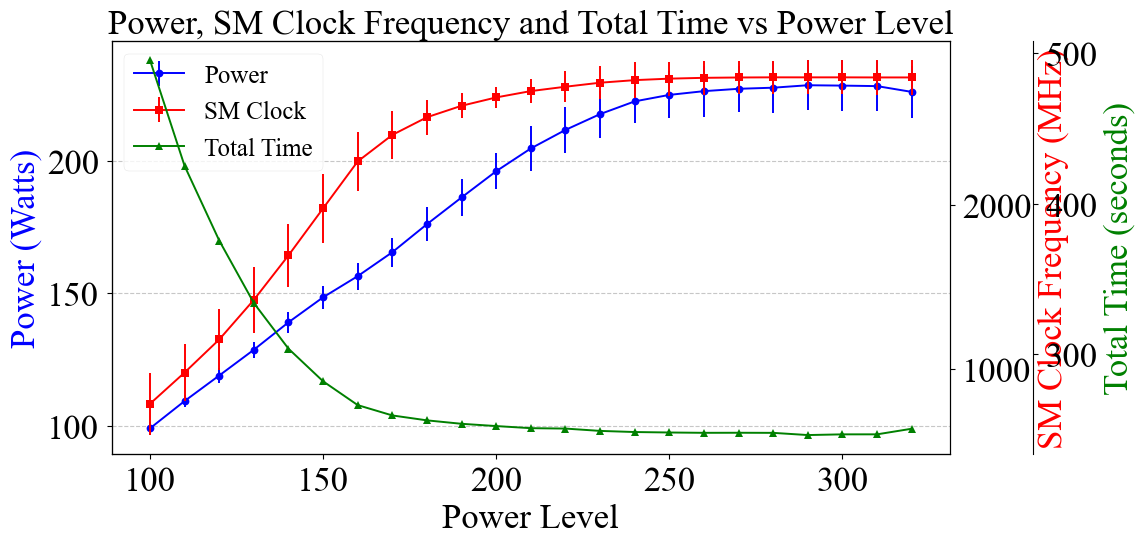

In [14]:
# Create figure with primary and secondary y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# Offset the right spine of ax3
ax3.spines['right'].set_position(('outward', 60))

# Plot mean power with error bars on primary y-axis
power_line = ax1.errorbar(data_power_freq['power_level'], data_power_freq['mean_power'], 
                         yerr=data_power_freq['std_power'], color='blue', label='Power',
                         marker='o', capsize=5)

# Plot mean SM clock with error bars on secondary y-axis
clock_line = ax2.errorbar(data_power_freq['power_level'], data_power_freq['mean_sm_clock'],
                         yerr=data_power_freq['std_sm_clock'], color='red', label='SM Clock',
                         marker='s', capsize=5)

# Plot total time on third y-axis
time_line = ax3.plot(data_power_freq['power_level'], data_power_freq['total_time'], 
                     color='green', label='Total Time', marker='^')

# Set labels and title
ax1.set_xlabel('Power Level')
ax1.set_ylabel('Power (Watts)', color='blue')
ax2.set_ylabel('SM Clock Frequency (MHz)', color='red')
ax3.set_ylabel('Total Time (seconds)', color='green')

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper left')

# Add title
plt.title('Power, SM Clock Frequency and Total Time vs Power Level')

# Add grids
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()